# NASA Common Research Model
## Drag Prediction Workshop 6

### Matched Lift Coefficient (0.50) with Drag Components


### References

http://aaac.larc.nasa.gov/tsab/cfdlarc/aiaa-dpw/

http://aaac.larc.nasa.gov/tsab/cfdlarc/aiaa-dpw/Workshop5/presentations/DPW5_Presentation_Files/14_DPW5%20Summary-Draft_V7.pdf


## Define Data Location
For remote data the interaction will use ssh to securely interact with the data<br/>
This uses the reverse connection capability in paraview so that the paraview server can be submitted to a job scheduler<br/>
Note: The default paraview server connection will use port 11111

In [1]:
remote_data = False
remote_server_auto = True

case_name = 'wb_coarse2p48'
data_dir='/home/users/p02208/scratch/case2'
#data_host='dstandingford@vis03'
paraview_cmd='mpiexec.hydra /home/users/p02208/rh-6.5/test/zCFD/bin/pvserver'

if not remote_server_auto:
    paraview_cmd=None

if not remote_data:
    data_host='localhost'
    paraview_cmd=None

In [2]:
import sys
sys.path.append(data_dir)

### zCFD Validation and Regression

In [3]:
# Validation criteria setup for CRM lift-matched (C_L = 0.5) L3 mesh drag components 
validate = True
regression = True
if (validate):
    valid = True
    valid_lower_alpha  = 2.20000-0.05000
    valid_upper_alpha  = 2.20000+0.05000
    valid_lower_cl     = 0.50000-0.00500
    valid_upper_cl     = 0.50000+0.00500
    valid_lower_cd     = 0.02502-0.00062
    valid_upper_cd     = 0.02502+0.00062
    valid_lower_cdp    = 0.01400-0.00050
    valid_upper_cdp    = 0.01400+0.00050
    valid_lower_cdf    = 0.01100-0.00075
    valid_upper_cdf    = 0.01100+0.00075
    print 'VALIDATING CRM DPW5 CASE'
    
if (regression):
    print 'REGRESSION CRM DPW5 L3 CASE'


VALIDATING CRM DPW5 CASE
REGRESSION CRM DPW5 L3 CASE


### Initialise Environment

In [4]:
%pylab inline
from paraview.simple import *
paraview.simple._DisableFirstRenderCameraReset()
import pylab as pl
import math

Populating the interactive namespace from numpy and matplotlib
paraview version 4.4.0-51-ga031770


### Data Connection
This starts paraview server on remote host and connects

In [5]:
from zutil.post import pvserver_connect
if remote_data:
    pvserver_connect(data_host=data_host,data_dir=data_dir,paraview_cmd=paraview_cmd)

### Get control dictionary

In [6]:
from zutil.post import get_case_parameters,print_html_parameters
parameters=get_case_parameters(case_name,data_host=data_host,data_dir=data_dir)

### Get status file

In [7]:
from zutil.post import get_status_dict
status=get_status_dict(case_name,data_host=data_host,data_dir=data_dir)
num_procs = str(status['num processor'])

### Define test conditions

In [8]:
#alpha = parameters['IC_1']['alpha'] # degrees
reference_area = 594720.0 # inches^2
reference_length = 275.8 # inches, mean chord. 
reference_span = 1156.75 # inches

from IPython.display import HTML
HTML(print_html_parameters(parameters))

pressure,101325.0
temperature,273.15
Reynolds No,5000000.0
Ref length,275.8
Speed,0.0
Mach No,0.85


In [9]:
import collections

# Names of cases
case_dict = collections.OrderedDict()

case_dict['wb_coarse2p48'] = {'name' : 'wb_coarse2p48',
                             'case' : 'CASE2A',
                             'level' : 2,
                             'alpha' : 2.489,
                              'wing' : [14,15,16,17,18,19,22,25],
                              'N' : 120220034,
                             }

case_dict['wb_medium2p48'] = {'name' : 'wb_medium2p48',
                             'case' : 'CASE2A',
                             'level' : 3,
                             'alpha' : 2.489,
                              'wing' : [14,15,16,17,18,19,22,25],
                              'N' : 171479171,
                             }

case_dict['wb_fine2p49'] = {'name' : 'wb_fine2p49',
                           'case' : 'CASE2A',
                             'level' : 4,
                             'alpha' : 2.50,
                            'wing' : [14,15,16,17,18,19,22,25],
                            'N' : 268135684,
                           }

case_dict['wbnp_medium2p64'] = {'name' : 'wbnp_medium2p64',
                               'case' : 'CASE2B',
                             'level' : 3,
                             'alpha' : 2.64,
                                'wing' : [41,42,43,44,45,46,47,49,53],
                                'N' : 176676926,
                               }

case_dict['wbnp_fine2p64'] = {'name' : 'wbnp_fine2p64',
                             'case' : 'CASE2B',
                             'level' : 4,
                             'alpha' : 2.64,
                             'wing' : [41,42,43,44,45,46,47,49,53],
                             'N': 305307926,
                             }



In [10]:
import zutil
reload(zutil)
import zutil.post
reload(zutil.post)
from zutil.post import cp_profile_wall_from_file
from zutil.post import cf_profile_wall_from_file




def plot_cp_profile(ax,file_root,span_loc,normal,location,data_table, alpha, filter):
    
    force_data = cp_profile_wall_from_file(file_root,
                              normal,
                              location,
                              func=plot_cp_array,
                              axis=ax,
                              span_loc=span_loc,
                              alpha=alpha,
                              data_table=data_table,
                              filter=filter)
    
def plot_cp_array(data_array,pts_array,**kwargs):
    ax = kwargs['axis']
    span_loc = kwargs['span_loc']
    cp_array = data_array.GetPointData()['cp']
    chord_array = data_array.GetPointData()['chord']
    ax.plot(chord_array, cp_array , 'b.',color='b',label='zCFD SST-2003')
    # Save data in data_array
    data_table=kwargs['data_table']
    for ind in range(0,len(cp_array)):
        data_table.append([0,0,0,0,0,0,0,0,0])
        #help(pts_array)
        data_table[ind][0] = pts_array.GetPoints()[ind][0]
        data_table[ind][1] = pts_array.GetPoints()[ind][1]
        data_table[ind][2] = pts_array.GetPoints()[ind][2]
        data_table[ind][3] = chord_array[ind]
        data_table[ind][4] = cp_array[ind]
        
        # Add sectional force integration - assumes closed loop
        #p1 = pts_array.GetPoints()[ind]
        #ind_next = ind + 1
        #if ind_next > len(cp_array):
        #    ind_next = 0
        #p2 = pts_array.GetPoints()[ind_next]
        #
        #p2 - p1
        
        

def plot_cf_profile(ax,file_root,span_loc,normal,location,data_table, alpha):
    
    force_data = cf_profile_wall_from_file(file_root,
                              normal,
                              location,
                              func=plot_cf_array,
                              axis=ax,
                              span_loc=span_loc,
                              alpha=alpha,
                              data_table=data_table)
    
def plot_cf_array(data_array,pts_array,**kwargs):
    ax = kwargs['axis']
    span_loc = kwargs['span_loc']
    cf_array = data_array.GetPointData()['frictionforce']
    cfmag_array = data_array.GetPointData()['cfmag']
    chord_array = data_array.GetPointData()['chord']
    ax.plot(chord_array, cf_array , 'b.',color='b',label='zCFD SST-2003')
    # Save data in data_array
    data_table=kwargs['data_table']
    for ind in range(0,len(cf_array)):
        data_table[ind][5] = cfmag_array[ind]
        data_table[ind][6] = cf_array[ind][0]
        data_table[ind][7] = cf_array[ind][1]
        data_table[ind][8] = cf_array[ind][2]
    
    

### Comparison Data

In [11]:
# Define wing cuts



cutter=[]

# WING SECTION  1: ETA = 0.1050, CHORD=466.466
# $!RUNMACROFUNCTION "SECTIONALCUTTER" ( 993.728, 121.459, 176.053,0.000,1.000,0.000)
cutter.append({'eta':0.1050,
               'chord':466.466,
               'position':[993.728, 121.459, 176.053,0.000,1.000,0.000]})
# WING SECTION  2: ETA = 0.1150, CHORD=459.571
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1002.168, 133.026, 176.306,0.000,1.000,0.000)
cutter.append({'eta':0.1150,
               'chord':459.571,
               'position':[1002.168, 133.026, 176.306,0.000,1.000,0.000]})
# WING SECTION  3: ETA = 0.1250, CHORD=452.687
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1010.656, 144.594, 176.539,0.000,1.000,0.000)
cutter.append({'eta':0.1250,
               'chord':452.687,
               'position':[1010.656, 144.594, 176.539,0.000,1.000,0.000]})
# WING SECTION  4: ETA = 0.1306, CHORD=448.836
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1015.435, 151.074, 176.659,0.000,1.000,0.000)
cutter.append({'eta':0.1306,
               'chord':448.836,
               'position':[1015.435, 151.074, 176.659,0.000,1.000,0.000]})
# WING SECTION  5: ETA = 0.2009, CHORD=400.743
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1076.873, 232.444, 177.509,0.000,1.000,0.000)
cutter.append({'eta':0.2009,
               'chord':400.743,
               'position':[1076.873, 232.444, 177.509,0.000,1.000,0.000]})
# WING SECTION  6: ETA = 0.2828, CHORD=344.991
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1148.974, 327.074, 178.606,0.000,1.000,0.000)
cutter.append({'eta':0.2828,
               'chord':344.991,
               'position':[1148.974, 327.074, 178.606,0.000,1.000,0.000]})
# WING SECTION  7: ETA = 0.3430, CHORD=304.101
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1202.038, 396.765, 180.222,0.000,1.000,0.000)
cutter.append({'eta':0.3430,
               'chord':304.101,
               'position':[1202.038, 396.765, 180.222,0.000,1.000,0.000]})
# WING SECTION  8: ETA = 0.3700, CHORD=285.806
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1225.822, 427.998, 181.162,0.000,1.000,0.000)
cutter.append({'eta':0.3700,
               'chord':285.806,
               'position':[1225.822, 427.998, 181.162,0.000,1.000,0.000]})
# WING SECTION  9: ETA = 0.3971, CHORD=278.111
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1249.711, 459.370, 182.250,0.000,1.000,0.000)
cutter.append({'eta':0.3971,
               'chord':278.111,
               'position':[1249.711, 459.370, 182.250,0.000,1.000,0.000]})
# WING SECTION 10: ETA = 0.5024, CHORD=248.312
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1342.440, 581.148, 188.658,0.000,1.000,0.000)
cutter.append({'eta':0.5024,
               'chord':248.312,
               'position':[1342.440, 581.148, 188.658,0.000,1.000,0.000]})
# WING SECTION 11: ETA = 0.6028, CHORD=219.904
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1430.914, 697.333, 198.060,0.000,1.000,0.000)
cutter.append({'eta':0.6028,
               'chord':219.904,
               'position':[1430.914, 697.333, 198.060,0.000,1.000,0.000]})
# WING SECTION 12: ETA = 0.7268, CHORD=184.844
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1540.091, 840.704, 213.659,0.000,1.000,0.000)
cutter.append({'eta':0.7268,
               'chord':184.844,
               'position':[1540.091, 840.704, 213.659,0.000,1.000,0.000]})
# WING SECTION 13: ETA = 0.8456, CHORD=151.235
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1644.738, 978.148, 233.317,0.000,1.000,0.000)
cutter.append({'eta':0.8456,
               'chord':151.235,
               'position':[1644.738, 978.148, 233.317,0.000,1.000,0.000]})
# WING SECTION 14: ETA = 0.9500, CHORD=121.735
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1736.708,1098.926, 253.727,0.000,1.000,0.000)
cutter.append({'eta':0.9500,
               'chord':121.735,
               'position':[1736.708,1098.926, 253.727,0.000,1.000,0.000]})
# WING SECTION 15: ETA = 0.9700, CHORD=116.095
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1754.313,1122.048, 257.777,0.000,1.000,0.000)
cutter.append({'eta':0.9700,
               'chord':116.095,
               'position':[1754.313,1122.048, 257.777,0.000,1.000,0.000]})
# WING SECTION 16: ETA = 0.9900, CHORD=110.452
# $!RUNMACROFUNCTION "SECTIONALCUTTER" (1771.927,1145.183, 261.823,0.000,1.000,0.000)
cutter.append({'eta':0.9900,
               'chord':110.452,
               'position':[1771.927,1145.183, 261.823,0.000,1.000,0.000]})


## Cp Profile

In [12]:
from zutil.post import get_case_root
from zutil.post import calc_force_wall
from zutil.post import ProgressBar

def plot_cp(case_name, workshop_case, alpha, data_table, filter):

    pbar = ProgressBar()

    pressure_force, friction_force = calc_force_wall(data_dir+'/'+get_case_root(case_name,num_procs),
                                                     [],half_model=True,
                                                     alpha=alpha)

    C_L   = (pressure_force[2] + friction_force[2])/reference_area
    C_D_P = pressure_force[0]/reference_area
    C_D_F = friction_force[0]/reference_area
    C_D   = C_D_P + C_D_F

    case_dict[case_name]['cl'] = C_L
    case_dict[case_name]['cdp'] = C_D_P
    case_dict[case_name]['cdf'] = C_D_F
    case_dict[case_name]['cd'] = C_D
    
    return
    
    fig = pl.figure(figsize=(20, 5*len(cutter)), dpi=150, facecolor='w', edgecolor='#E48B25')

    fig.suptitle('NASA Common Research Model - Drag Prediction Workshop 6 '+workshop_case+' \n' 
                 + r'$\alpha$=' + ('%.3f ' % alpha) 
                 + ('$\mathbf{C_L}$=%.4f ' % C_L) 
                 + ('$\mathbf{C_D}$=%.4f ' % C_D) 
                 + ('$\mathbf{C_{D(PR)}}$=%.4f ' % C_D_P) 
                 + ('$\mathbf{C_{D(FR)}}$=%.4f ' % C_D_F), 
                 fontsize=24, fontweight='normal', color = '#5D5858')

    plot = 1
    pbar += 5

    data_array = data_table[case_name]
    data_array['cl_tot'] = C_L
    
    for station in cutter:
        span_loc = station['eta']
        
        data_array[span_loc] = []
        
        ax = fig.add_subplot(len(cutter)/2,2,plot)
        ax.set_title('$\mathbf{C_p}$ span='+str(span_loc*100)+'% \n', 
                     fontsize=20, fontweight='normal', color = '#E48B25')
        ax.grid(True)
        ax.set_xlabel('$\mathbf{x/c}$', fontsize=24, fontweight='bold', color = '#5D5858')
        ax.set_ylabel('$\mathbf{C_p}$', fontsize=24, fontweight='bold', color = '#5D5858')
        ax.axis([0.0,1.0,1.0,-1.2])

        normal = [station['position'][i] for i in range(3,6)]
        location = [station['position'][i] for i in range(0,3)] 
        plot_cp_profile(ax,data_dir+'/'+get_case_root(case_name,num_procs),
                        span_loc,
                        normal,
                        location,
                        data_array[span_loc],
                       alpha,
                       filter)
        """
        for source, colour in sources:
            plotlist_x = []
            plotlist_y = []
            for key, value in dpw5_comparative_data["L3"][source][station]['X/C'].iteritems():
                plotlist_x.append(value)
            for key, value in dpw5_comparative_data["L3"][source][station]['CP'].iteritems():
                plotlist_y.append(value)

            ax.plot(plotlist_x, plotlist_y, 'r.', color=colour, label=source)
        """   
        legend = ax.legend(loc='best', scatterpoints=1, numpoints=1, shadow=False, fontsize=16)
        legend.get_frame().set_facecolor('white')
        ax.tick_params(axis='x', pad=16)

        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
            tick.label.set_fontweight('normal') 
            tick.label.set_color('#E48B25')
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(18)
            tick.label.set_fontweight('normal') 
            tick.label.set_color('#E48B25')    

        plot += 1
        pbar+=5

    fig.subplots_adjust(hspace=0.3) 
    fig.savefig('images/DPW6_'+workshop_case+'_cp_profile.png')
    pbar.complete()
    show()
    #from IPython.display import FileLink, display 
    #display(FileLink('images/DPW6_cp_profile.png'))

    
def plot_cf(case_name, alpha, data_table):

    pbar = ProgressBar()

    pressure_force, friction_force = calc_force_wall(data_dir+'/'+get_case_root(case_name,num_procs),
                                                     [],half_model=True,
                                                     alpha=alpha)

    C_L   = (pressure_force[2] + friction_force[2])/reference_area
    C_D_P = pressure_force[0]/reference_area
    C_D_F = friction_force[0]/reference_area
    C_D   = C_D_P + C_D_F

    fig = pl.figure(figsize=(20, 10*len(cutter)), dpi=150, facecolor='w', edgecolor='#E48B25')

    fig.suptitle('NASA Common Research Model - Drag Prediction Workshop 6 \n' 
                 + r'$\alpha$=' + ('%.3f ' % alpha) 
                 + ('$\mathbf{C_L}$=%.4f ' % C_L) 
                 + ('$\mathbf{C_D}$=%.4f ' % C_D) 
                 + ('$\mathbf{C_{D(PR)}}$=%.4f ' % C_D_P) 
                 + ('$\mathbf{C_{D(FR)}}$=%.4f ' % C_D_F), 
                 fontsize=24, fontweight='normal', color = '#5D5858')

    plot = 1
    pbar += 5

    data_array = data_table[case_name]

    for station in cutter:
        span_loc = station['eta']
        
        ax = fig.add_subplot(len(cutter)/2,2,plot)
        ax.set_title('$\mathbf{C_p}$ span='+str(span_loc*100)+'% \n', 
                     fontsize=20, fontweight='normal', color = '#E48B25')
        ax.grid(True)
        ax.set_xlabel('$\mathbf{x/c}$', fontsize=24, fontweight='bold', color = '#5D5858')
        ax.set_ylabel('$\mathbf{C_f}$', fontsize=24, fontweight='bold', color = '#5D5858')
        ax.axis([0.0,1.0,1.0,-1.2])

        normal = [station['position'][i] for i in range(3,6)]
        location = [station['position'][i] for i in range(0,3)] 
        plot_cf_profile(ax,data_dir+'/'+get_case_root(case_name,num_procs),
                        span_loc,
                        normal,
                        location,
                        data_array[span_loc],
                       alpha)
        """
        for source, colour in sources:
            plotlist_x = []
            plotlist_y = []
            for key, value in dpw5_comparative_data["L3"][source][station]['X/C'].iteritems():
                plotlist_x.append(value)
            for key, value in dpw5_comparative_data["L3"][source][station]['CP'].iteritems():
                plotlist_y.append(value)

            ax.plot(plotlist_x, plotlist_y, 'r.', color=colour, label=source)
        """   
        legend = ax.legend(loc='best', scatterpoints=1, numpoints=1, shadow=False, fontsize=16)
        legend.get_frame().set_facecolor('white')
        ax.tick_params(axis='x', pad=16)

        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(18) 
            tick.label.set_fontweight('normal') 
            tick.label.set_color('#E48B25')
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(18)
            tick.label.set_fontweight('normal') 
            tick.label.set_color('#E48B25')    

        plot += 1
        pbar+=5

    fig.subplots_adjust(hspace=0.3) 
    fig.savefig("images/DPW6_'+case_name+'_cf_profile.png")
    pbar.complete()
    show()
    #from IPython.display import FileLink, display 
    #display(FileLink('images/DPW6_cf_profile.png'))    

In [13]:

data_table = {}

for case in case_dict:
    
    case_name = case_dict[case]['name']
    alpha = case_dict[case]['alpha']
    
    data_table[case_name] = {}
    
    workshop_case = case_dict[case]['case'] + '-L'+str(case_dict[case]['level'])
    
    plot_cp(case_name, workshop_case, alpha, data_table, case_dict[case]['wing'])
    #plot_cf(case_name, alpha, data_table)


CASE2A 2 0.0269894745875
CASE2A 3 0.0258555978553
CASE2A 4 0.0260506105818
CASE2B 3 0.0300726398902
CASE2B 4 0.0298997574061


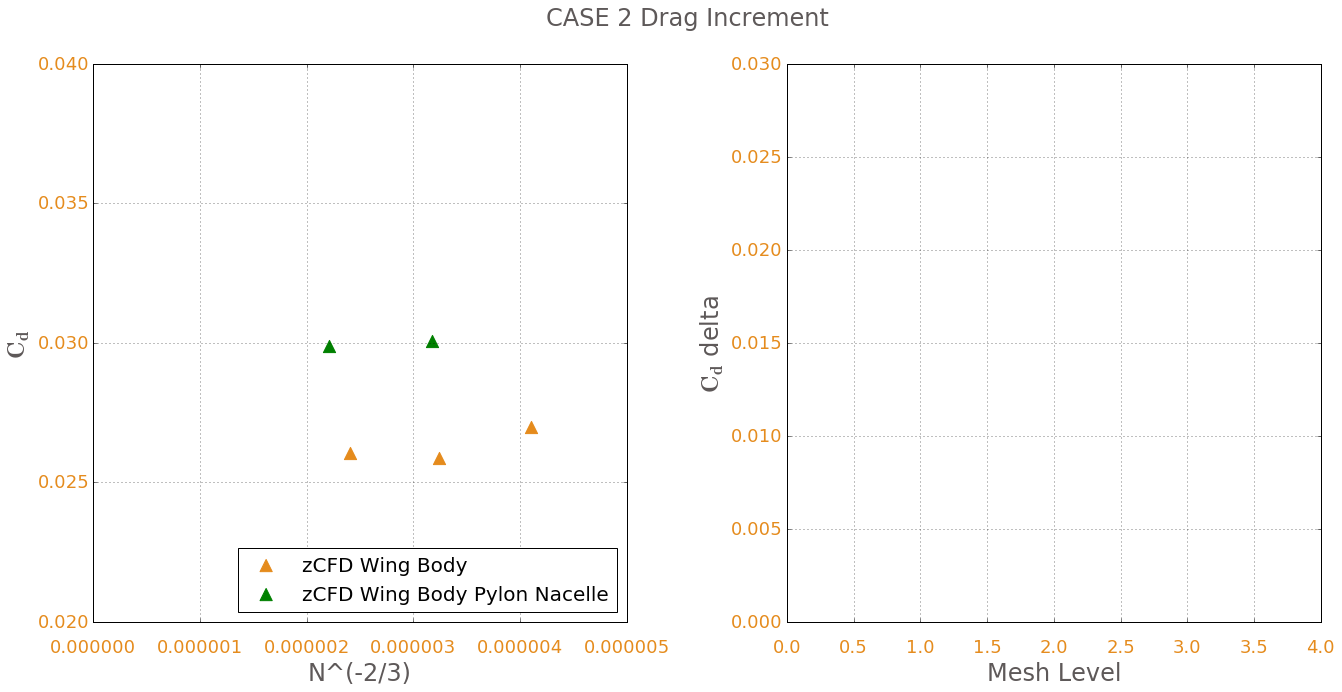

/home/users/p02208/zPost/ipynb/NASA_CRM/images/case2_drag_increment.png

In [29]:

zeno_orange = '#E58B1C'
zeno_grey = '#5D5858'
cl = []
cd = []
N = []
cl_np = []
cd_np = []
N_np = []

for case in case_dict:
    case_var = case_dict[case]
    if case_var['case'] == 'CASE2A':
        cl.append(case_var['cl'])
        cd.append(case_var['cd'])
        #print math.pow(float(case_var['N']),-2.0/3.0)
        N.append(math.pow(float(case_var['N']),-2.0/3.0))
        print case_var['case'], case_var['level'], cd[-1]
    else:
        cl_np.append(case_var['cl'])
        cd_np.append(case_var['cd'])
        N_np.append(math.pow(float(case_var['N']),-2.0/3.0))
        print case_var['case'], case_var['level'], cd_np[-1]
        
    

fig = figure(figsize=(22, 10), dpi=150, facecolor='w', edgecolor=zeno_orange)
fig.suptitle(r'CASE 2 Drag Increment', 
             fontsize=24, fontweight='normal', color = zeno_grey)

ax = fig.add_subplot(1,2,1)
ax.grid(True)
ax.set_xlabel(r'N^(-2/3)', fontsize=24, fontweight='normal', color = zeno_grey)
ax.set_ylabel(r'$\mathbf{C_d}$', fontsize=24, fontweight='normal', color = zeno_grey)
ax.axis([0.0,5e-6,0.02,0.04])
ax.scatter(N,cd,color=zeno_orange, marker="^", s=149,
           label='zCFD Wing Body')
ax.scatter(N_np,cd_np,color='green', marker="^", s=149,
           label='zCFD Wing Body Pylon Nacelle')
legend = ax.legend(loc='lower right', scatterpoints=1, numpoints=1, shadow=False, fontsize=20)
legend.get_frame().set_facecolor('white')
ax.tick_params(axis='x', pad=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
    tick.label.set_fontweight('normal') 
    tick.label.set_color(zeno_orange)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
    tick.label.set_fontweight('normal') 
    tick.label.set_color(zeno_orange)    

ax = fig.add_subplot(1,2,2)
ax.grid(True)
ax.set_xlabel(r'Mesh Level', fontsize=24, fontweight='normal', color = zeno_grey)
ax.set_ylabel(r'$\mathbf{C_d}$ delta', fontsize=24, fontweight='normal', color = zeno_grey)
ax.axis([0,4,0,0.03])
"""
ax.scatter(data[1], data[2], color='green', marker = "o", s=100, 
           label='Ladson ' + '$\mathbf{Re}$' + ' = 6m (fixed transition)')  
ax.scatter(cl, cd, marker="^", s=149, color=zeno_orange, 
           label='zCFD ' + '$\mathbf{Re}$' +  ' = 6m (fully turbulent)')
ax.scatter(cl_comp, cd_comp, marker="x", s=169, color='black', label='CFL3D SST-V 897x257')
"""
legend = ax.legend(loc='lower right', scatterpoints=1, numpoints=1, shadow=False, fontsize=20)
#legend.get_frame().set_facecolor('white')
ax.tick_params(axis='x', pad=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
    tick.label.set_fontweight('normal') 
    tick.label.set_color(zeno_orange)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
    tick.label.set_fontweight('normal') 
    tick.label.set_color(zeno_orange)    

fig.subplots_adjust(wspace=0.3) 
fig.savefig("images/case2_drag_increment.png")
show()
from IPython.display import FileLink, display 
display(FileLink('images/case2_drag_increment.png'))

In [13]:
from string import Template

def write_tecplot(data_table, workshop_case, mesh_level, alpha):
    
    title = 'AllanM-Custom-SST-2003'
    name = 'AllanM'
    solver = 'zCFD'
    algorithm = 'Finite Volume Explicit'
    turbulence_model = 'SST-2003'
    grid_id = 'Custom'
    
    header_script = Template(r"""#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#
#   DPW-VI SECTIONAL CP CUT DATA SUBMITTAL FORM (Version 4 - 22 April 2016)
#
#       Due 14 MAY 2016
#
#                XXX:	First-author participant's last name + specific identifier if submitting
#                       multiple grid types, soln methods, turb models, etc.
#                       EXAMPLES:  JonesG-CommonMB-SST-1
#                                  JonesG-CommonOverset-SA-1
#                                  JonesG-CommonOverset-SA-2
#                                  JonesG-CommonHex-kw-1
#                                  JonesG-CommonHybrid-ke-1
#                                  JonesG-CommonPrism-SST-1
#                                  JonesG-Custom-SA-1
#                                  etc.
#
#       NOMENCLATURE:
#         GRID_LEVEL:   Level of grid refinement (1-6)
#          GRID_SIZE:   Number of grid nodes or cells
#              ALPHA:	Angle of Attack, deg
#                 CL:	Coefficient of Lift            (total) (L/(0.5*rho_inf*U_inf^2*A)  )
#                 CD:	Coefficient of Drag            (total) (D/(0.5*rho_inf*U_inf^2*A)  )
#                 CM:	Coefficient of Pitching Moment (total) (M/(0.5*rho_inf*U_inf^2*A*c)) (+ nose-up)
#              CD_PR:   Surface-Pressure Integrated Drag Coefficient
#              CD_SF:   Skin-Friction Integrated Drag Coefficient
#          CD-CL2/PA:   CD_TOT - (CL_TOT*CL_TOT)/(PI*AR)
#              *_TOT:   Total Configuration Force/Moment
#             *_WING:   Wing Component Force/Moment
#              *_FUS:   Fuselage Component Force/Moment
#                ETA:	Span fraction   = y/BO2
#
#                  X:   X coordinate
#                  Y:   Y coordinate
#                  Z:   Z coordinate
#				 X/C:   Chord Fraction = (X - X_LE)/CHORD
#                 CP:   Coefficient of pressure
#                 CF:   Skin-friction coefficient at wall [tauw/(freestream dynamic pressure)]
#        CFX,CFY,CFZ:   Components of skin-friction coefficient at wall
#
#    CUT DEFINITIONS:   ETA     X_LE      Y_LE     Z_LE     CHORD
#    WING SECTION  1:   0.1050   993.728   121.459  176.053  466.466
#    WING SECTION  2:   0.1150  1002.168   133.026  176.306  459.571
#    WING SECTION  3:   0.1250  1010.656   144.594  176.539  452.687
#    WING SECTION  4:   0.1306  1015.435   151.074  176.659  448.836
#    WING SECTION  5:   0.2009  1076.873   232.444  177.509  400.743
#    WING SECTION  6:   0.2828  1148.974   327.074  178.606  344.991
#    WING SECTION  7:   0.3430  1202.038   396.765  180.222  304.101
#    WING SECTION  8:   0.3700  1225.822   427.998  181.162  285.806
#    WING SECTION  9:   0.3971  1249.711   459.370  182.250  278.111
#    WING SECTION 10:   0.5024  1342.440   581.148  188.658  248.312
#    WING SECTION 11:   0.6028  1430.914   697.333  198.060  219.904
#    WING SECTION 12:   0.7268  1540.091   840.704  213.659  184.844
#    WING SECTION 13:   0.8456  1644.738   978.148  233.317  151.235
#    WING SECTION 14:   0.9500  1736.708  1098.926  253.727  121.735
#    WING SECTION 15:   0.9700  1754.313  1122.048  257.777  116.095
#    WING SECTION 16:   0.9900  1771.927  1145.183  261.823  110.452
#
#		Tecplot macro: DPW-VI.SectionalCutter_v1.mcr will define cuts
#
#   REFERENCE VALUES:
#                       Planform ref area, A         = 594720.00 inches^2
#                       Mean aerodynamic chord, Cref =    275.80 inches
#                       Full-span length, B          =   2313.50 inches
#                       Semi-span length, BO2        =   1156.75 inches
#                       x moment center              =   1325.90 inches
#                       y moment center              =    468.75 inches
#                       z moment center              =    177.95 inches
#                       Aspect Ratio, AR             =      9.00
#
#    FLOW CONDITIONS:
#                 Mach Number: 0.85
#             Reynolds Number: 5.0 million (based on Cref=275.80)
#             Freestream Temp: 100 deg F
#
#              NOTES: 1. All numerical data fields can be free-formatted.
#                     2. Please use at least 4 decimal places for coordinate values
#                     3. Please use at least 6 decimal places for coefficient values
#                     4. Only include one grid type, grid size, soln method, turb model, etc per form.
#                     5. Fill fields with value of -999 for data that are not available.
#
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

TITLE = "$XXX"
VARIABLES =   "X"       "Y"       "Z"     "X/C"     "CP"      "CF"       "CFX"     "CFY"     "CFZ"

#---------------------------------------------------
#   PARTICIPANT, GRID, AND SOLVER INFORMATION
#---------------------------------------------------
DATASETAUXDATA Name            = "$Name_of_Participant"
DATASETAUXDATA SubmissionDate  = "Date of Submission"
DATASETAUXDATA SolverName      = "$Solver_name"
DATASETAUXDATA BasicAlgorithm  = "$Algorithm"
DATASETAUXDATA TurbulenceModel = "SST-2003"
DATASETAUXDATA Miscellaneous   = "???"
DATASETAUXDATA GridId          = "Custom"
DATASETAUXDATA Mach            = "0.85"

#-------------------------------------------------------------------------------
#CASE 2A: WING/BODY SINGLE-POINT GRID CONVERGENCE STUDY
#  REQUIRED: L2, L3, L4, L5 (COARSE, MEDIUM, FINE, EXTRAFINE) GRIDS
#  OPTIONAL: L1, L6 (TINY, SUPERFINE) GRIDS
#  Separate File for each grid level
#-------------------------------------------------------------------------------
#CASE 2B: WING/BODY/NACELLE/PYLON  SINGLE-POINT GRID CONVERGENCE STUDY
#  REQUIRED: L2, L3, L4, L5 (COARSE, MEDIUM, FINE, EXTRAFINE) GRIDS
#  OPTIONAL: L1, L6 (TINY, SUPERFINE) GRIDS
#  Separate File for each grid level
#-------------------------------------------------------------------------------
#CASE 3: WING-BODY STATIC AEROELASTIC STUDY (L3, MEDIUM GRID)
#  REQUIRED: ALPHA = 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00
#  OPTIONAL: ADDITIONAL ANGLES
#  Separate File for each angle of attack
#-------------------------------------------------------------------------------
#CASE 4: WING-BODY SOLUTION ADAPTIVE GRID STUDY
#  OPTIONAL: ALPHA = 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00
#  OPTIONAL: ADDITIONAL ANGLES
#  Separate File for each angle of attack
#-------------------------------------------------------------------------------
#CASE 5: WING-BODY COUPLED AEROELASTIC STUDY (L3, MEDIUM GRID
#  OPTIONAL: ALPHA = 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00
#  OPTIONAL: ADDITIONAL ANGLES
#  Separate File for each angle of attack
#-------------------------------------------------------------------------------
#CASE 6: WING-BODY PATTICIPANT GENERATED GRID STUDY
#  OPTIONAL: ALPHA = 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00
#  OPTIONAL: ADDITIONAL ANGLES
#  Separate File for each angle of attack
#-------------------------------------------------------------------------------""")
    
    
    script_str = header_script.substitute({'XXX':title,
                                    'Name_of_Participant':name,
                                    'Solver_name':solver,
                                    'Algorithm':algorithm,
                                   })
    
    data_script = Template("""
ZONE T="GRIDLEVEL=L$level ALPHA=$alpha - WING SECTION  $section"
AUXDATA CFDCASE         = "$CASE"
AUXDATA ID              = "id - to be specified by the committee upon receipt"
AUXDATA Name            = "$Name_of_Participant"
AUXDATA SolverName      = "$Solver_name"
AUXDATA TurbulenceModel = "SST-2003"
AUXDATA GridId          = "Custom"
AUXDATA GridLevel       = "$level"
AUXDATA ALPHA           = "$alpha"
AUXDATA CLTOTAL         = "$CLTOTAL"
AUXDATA ETA             = "0.105"
""")
    
    i = 1
    for cut in cutter:
        eta = cut['eta']
        cl_tot = data_table['cl_tot']
        data_str = data_script.substitute({'level':mesh_level,
                               'alpha':alpha,
                               'section':i,
                                'CASE':workshop_case,
                                'Name_of_Participant':name,
                                'Solver_name':solver,
                                'CLTOTAL':cl_tot,           
                                           
                               })
        i += 1
        
        script_str += data_str
        
        for p in data_table[eta]:
            for c in range(0,3):
                script_str += ' {: .4f} '.format(p[c])
            for c in range(3,len(p)):
                script_str += ' {: .6f} '.format(p[c])
            script_str += '\n'
        
        #print eta
        #print data_table[eta][0]
    
    #print script_str
    with open(workshop_case+'-L'+str(mesh_level)+"-SectionalCuts.dat", "w") as text_file:
        text_file.write(script_str)
    
for case in cases:
    
    case_name = case[0]
    alpha = case[1]
    workshop_case = case[2]
    mesh_level = case[3]
    
    data_table[case_name]
    
    write_tecplot(data_table[case_name], workshop_case, mesh_level, alpha)

## Convergence

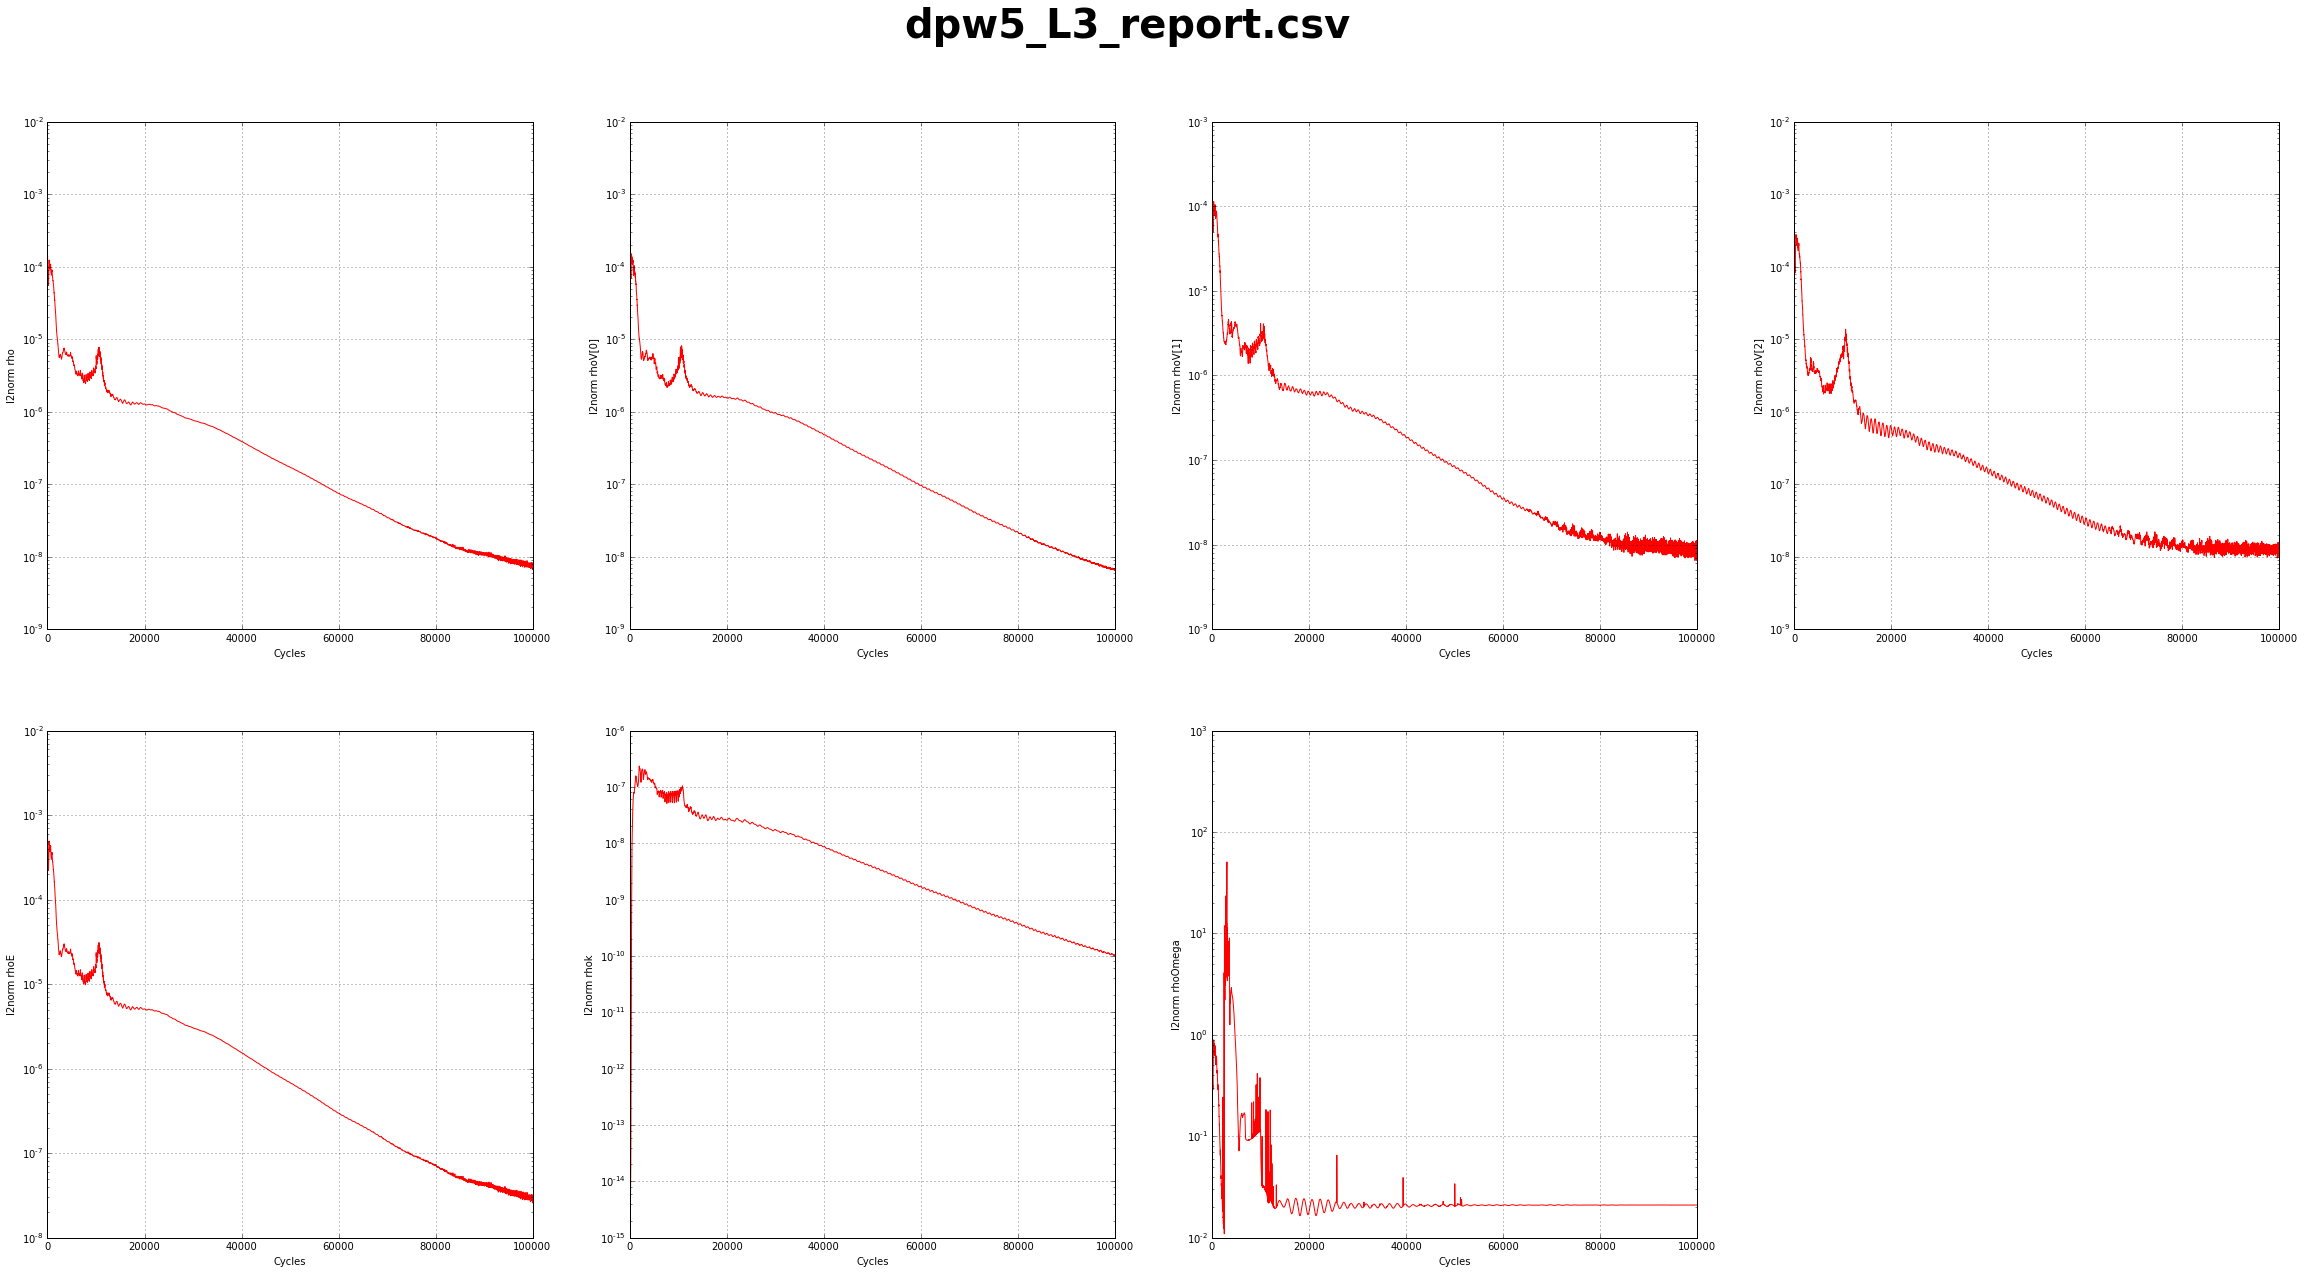

In [12]:
from zutil.post import residual_plot, get_case_report
residual_plot(get_case_report(case_name))
show()

## Check validation and regression

In [13]:
if (validate):
    valid = (validate_data('alpha', alpha, valid_lower_alpha, valid_upper_alpha)
             and validate_data('C_L', C_L, valid_lower_cl, valid_upper_cl)
             and validate_data('C_D', C_D, valid_lower_cd, valid_upper_cd)
             and validate_data('C_D_P', C_D_P, valid_lower_cdp, valid_upper_cdp)
             and validate_data('C_D_F', C_D_F, valid_lower_cdf, valid_upper_cdf))  
    if (valid):
        print 'VALIDATION = PASS :-)'
    else:
        print 'VALIDATION = FAIL :-('   
        


VALIDATION = PASS :-)


In [14]:
if (regression):
    import pandas as pd
    pd.options.display.float_format = '{:,.6f}'.format
    print 'REGRESSION DATA'
    regress = {'version' : ['v0.0'  , '30k'  , 'CURRENT'], 
               'alpha'   : [2.217000, 2.217000, alpha], 
               'C_L'     : [0.497464, 0.498132, C_L],
               'C_D'     : [0.024460, 0.024495, C_D],
               'C_D_P'   : [0.014094, 0.014099, C_D_P],
               'C_D_F'   : [0.010366, 0.010396, C_D_F]}
    regression_table = pd.DataFrame(regress, columns=['version','alpha','C_L','C_D','C_D_P','C_D_F'])
    print regression_table

REGRESSION DATA
   version    alpha      C_L      C_D    C_D_P    C_D_F
0     v0.0 2.217000 0.497464 0.024460 0.014094 0.010366
1      30k 2.217000 0.498132 0.024495 0.014099 0.010396
2  CURRENT 2.217000 0.498059 0.024485 0.014073 0.010411


### Cleaning up

In [15]:
if remote_data:
    print 'Disconnecting from remote paraview server connection'
    Disconnect()

Disconnecting from remote paraview server connection
Exiting...
[dstandingford@vis03] out: 